<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Hands%20On/Dia%201/Pendulo_Simple_REBoot_Problema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

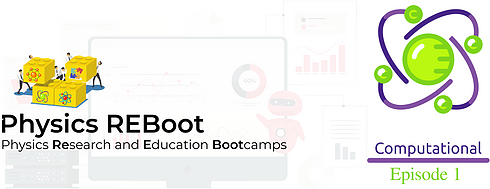

#***El Péndulo Simple***

A continuación se presenta la resolución de las ecuaciones diferenciales asociadas al sistema físico del péndulo simple o péndulo ideal.

El péndulo simple consta de una cuerda de longitud **l** (con masa despreciable) fijo en el extremo superior y con una masa puntual **m** (de dimensión despreciable) en el extremo inferior:

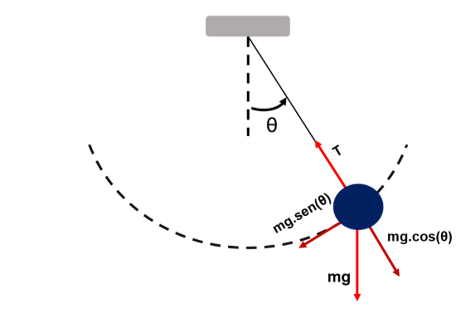

En el sistema hay dos fuerzas involucradas, la tensión **T** y el peso **mg**. 

Para escribir las ecuaciones de movimiento es necesario primero, descomponer las fuerzas de modo de que sean paralelas o perpendiculares al movimiento. En este caso el movimiento esta definido a lo largo de la circunferencia y el eje perpendicular corresponde a la dirección de la cuerda. 

Haciendo uso del diagrama de cuerpo libre presentado anteriormente, y la segunda ley de Newton, escribimos la ecuación correspondiente a la aceleración tangencial:

$F_{Tang}= -mgsen(\theta ) = ma_{Tang}$

donde  $a_{Tang} = l.\ddot{\theta}$

Sustituyendo la segunda ecucación dentro de la primera obtenemos:

$ -gsen(\theta ) = l.\ddot{\theta}$

Con esta información, podemos excribir las ecuaciones de movimiento para definir el sistema, donde:

$ \dot{\theta}= \frac{d\theta}{dt} = \omega $

$ \ddot{\theta}= \frac{d\omega}{dt} = -mg.sen(\theta)/l $

En esta ocasión, nuestra tarea es:

* Crear nuestra propia implementación en Python del *Pendulo Simple* usando la ecuación diferencial presentada anteriormente.

* Ilustrar graficamente la evolución del sistema en función del tiempo




Empezemos por cargar las librerias y paquetes que usaremos:

In [1]:
import numpy as np #NumPy paquete de computo cientifico, permite hacer arrays y tambien tiene constantes y funciones
from scipy.integrate import solve_ivp #Integracion numerica de un sistema de ecuaciones ordinarias con condiciones iniciales Solve_ivp
import matplotlib.pyplot as plt #Paquete de graficos

**Solve_ivp** requiere como input una función que consiste en las ecuaciones diferenciales a ser resueltas en forma de vector:

El primer paso consiste en definir las variables que van a ser determinadas: 

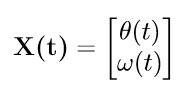

Luego se define la función de sus derivadas, $\dot{X(t)} = f(t,X)$ donde **t** es la variable independiente y **X** el vector que definimos anteriormente. 

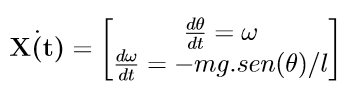

Finalmente, se indican los valores iniciales, de igual manera en forma vectorial:

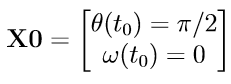

La función se define:

In [30]:
# definir ecucacion de movimiento del pendulo como funcion
def f(t,X):
    g = 9.8 # [m/s^2] 
    l = 0.2 #[m]
# Posición angular theta, entrada 0 del vector X
    dtheta = X[1]
# Velocidad Angular, entrada 1 del vector X
    domega = (-g*np.sin(X[0])) / l
    
    return np.array([dtheta , domega]) #(derivada de X[0], derivada de X[1]), (Velocidad Angular, Aceleracion)

t = np.linspace(0, 100, 101)
X0 = [np.pi/2, 0] #Condiciones Iniciales en forma de vector [ , ]
results = solve_ivp( f, t, X0, rtol=1e-8) #funcion, intervalo de tiempo (t0, tf), vector condiciones iniciales, sensitividad?
#rtol se refiere a la tolerancia de precision, en este caso, el numero de decimales de precision

Finalmente graficamos la solución:


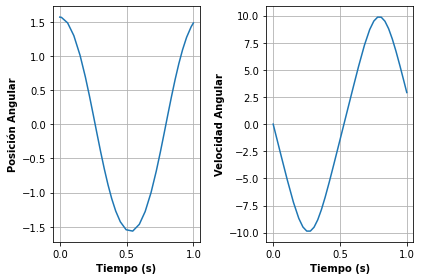

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(results.t, results.y[0]) #Entrada 0 del vector X
ax1.set_ylabel('Posición Angular',fontweight='bold')
ax1.set_xlabel('Tiempo (s)',fontweight='bold')
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(results.t, results.y[1]) #Entrada 1 del vector X
ax2.set_ylabel('Velocidad Angular', fontweight='bold')
ax2.set_xlabel('Tiempo (s)',fontweight='bold')
ax2.grid()
plt.tight_layout()


In [32]:
results

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 236
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.01236129, 0.05883871, 0.10531613, 0.15179355,
       0.19174221, 0.2226295 , 0.25129535, 0.27829583, 0.30592097,
       0.33354612, 0.36117126, 0.38879641, 0.41885649, 0.45329579,
       0.49680076, 0.54612881, 0.59545686, 0.63928501, 0.68355603,
       0.72260453, 0.75336404, 0.78195926, 0.8089192 , 0.836481  ,
       0.86404281, 0.89160461, 0.91916641, 0.94931478, 0.98388604,
       1.        ])
 t_events: None
        y: array([[ 1.57079633,  1.56705269,  1.48599784,  1.29972135,  1.01218766,
         0.69347005,  0.41212407,  0.13415857, -0.13273512, -0.40087997,
        -0.65455682, -0.88563518, -1.08792878, -1.27049542, -1.42773903,
        -1.5442213 , -1.56421183, -1.4650129 , -1.27761321, -0.99749435,
        -0.68366827, -0.40264778, -0.12500694,  0.14148278,  0.40870509,
       